In [1]:
import xgboost as xgb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

# 熊野くん作
import sys
import os
sys.path.append(os.path.join(os.path.dirname("."), '../Script'))
import load_npy as ln

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [47]:
#nums-----------------------------------------------
T = 5
Fr = 100
N_F = Fr/2
FREQ = np.linspace(0, N_F, (T*Fr)//2)

In [48]:
parentpath = "../Data/センサ別npyファイル"
ld = ln.Load(parentpath)

In [33]:
pos = "Hand"
tlabel_tdata = ld.train_load(pos, "Label")
glacc_tdata = ld.train_load(pos, "GLAcc")
t_walk_glacc = glacc_tdata[np.where(tlabel_tdata[:,0] == 2)[0]]
t_run_glacc = glacc_tdata[np.where(tlabel_tdata[:,0] == 3)[0]]
t_bike_glacc = glacc_tdata[np.where(tlabel_tdata[:,0] == 4)[0]]

In [34]:
label_vdata = ld.val_load(pos, "Label")
glacc_vdata = ld.val_load(pos, "GLAcc")
v_walk_glacc = glacc_tdata[np.where(label_vdata[:,0] == 2)[0]]
v_run_glacc = glacc_tdata[np.where(label_vdata[:,0] == 3)[0]]
v_bike_glacc = glacc_tdata[np.where(label_vdata[:,0] == 4)[0]]

In [35]:
#class and functions for map()---------------------------------------
class Calc():
    def dv_average(self, x,y):
        x_dv = self.calc_dv(x)
        y_dv = self.calc_dv(y)
        xy = np.sqrt(np.square(x_dv) + np.square(y_dv))
        average_data = np.average(xy)
        return average_data
    def calc_dv(self, num_data):
        pre_num = np.delete(num_data,-1)
        post_num = np.delete(num_data,0)
        dv = (pre_num + post_num) * (1/Fr) * (1/2)
        return dv
c = Calc()

In [36]:
t_walk = np.array(list(map(c.dv_average, t_walk_glacc[:,:,0], t_walk_glacc[:,:,1])))
t_run = np.array(list(map(c.dv_average, t_run_glacc[:,:,0], t_run_glacc[:,:,1])))
t_bike = np.array(list(map(c.dv_average, t_bike_glacc[:,:,0], t_bike_glacc[:,:,1])))

In [37]:
v_walk = np.array(list(map(c.dv_average, v_walk_glacc[:,:,0], v_walk_glacc[:,:,1])))
v_run = np.array(list(map(c.dv_average, v_run_glacc[:,:,0], v_run_glacc[:,:,1])))
v_bike = np.array(list(map(c.dv_average, v_bike_glacc[:,:,0], v_bike_glacc[:,:,1])))

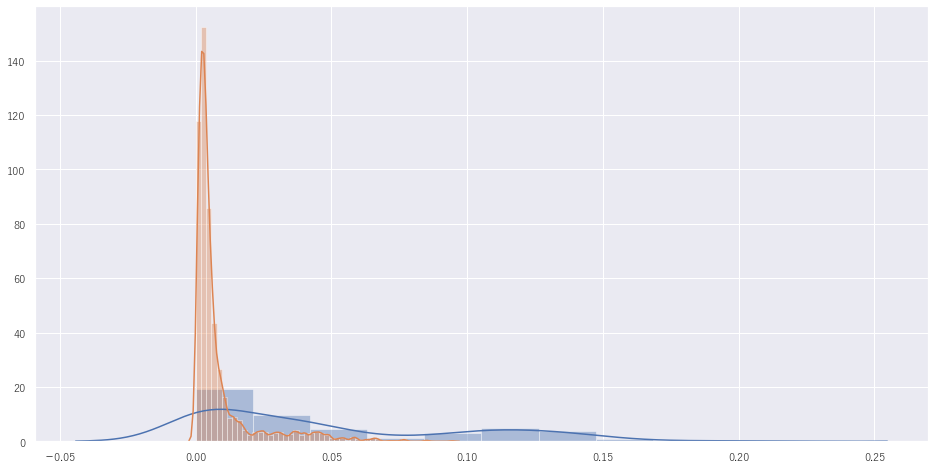

In [45]:
plt.figure(figsize=(16, 8))
sns.distplot(v_run.reshape([-1, 1]), label='train_bike')
sns.distplot(v_bike.reshape([-1, 1]), label='val_bike')


# 分布を確認する

In [85]:
def load_npy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc_ver3.npy"
    return np.load(file_path)

In [86]:
train_Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")
train_Label.shape

(195491, 500, 1)

In [87]:
train_Bag = load_npy("Bag")
train_Hips = load_npy("Hips")
train_Torso = load_npy("Torso")
train_Hand = load_npy("Hand")

train_Hand.shape

(195491, 500, 3)

In [88]:
def user2_load_npy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_LAcc_ver3.npy"
    return np.load(file_path)[:14813]

In [89]:
user2_Label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:14813].reshape([-1, 500, 1])
user2_Label.shape

(14813, 500, 1)

In [90]:
user2_Bag = user2_load_npy("Bag")
user2_Hips = user2_load_npy("Hips")
user2_Torso = user2_load_npy("Torso")
user2_Hand = user2_load_npy("Hand")

user2_Hand.shape

(14813, 500, 3)

In [91]:
def user3_load_npy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_LAcc_ver3.npy"
    return np.load(file_path)[14813:]

In [92]:
user3_Label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[14813:].reshape([-1, 500, 1])
user3_Label.shape

(13872, 500, 1)

In [93]:
user3_Bag = user3_load_npy("Bag")
user3_Hips = user3_load_npy("Hips")
user3_Torso = user3_load_npy("Torso")
user3_Hand = user3_load_npy("Hand")

user3_Hand.shape

(13872, 500, 3)

C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


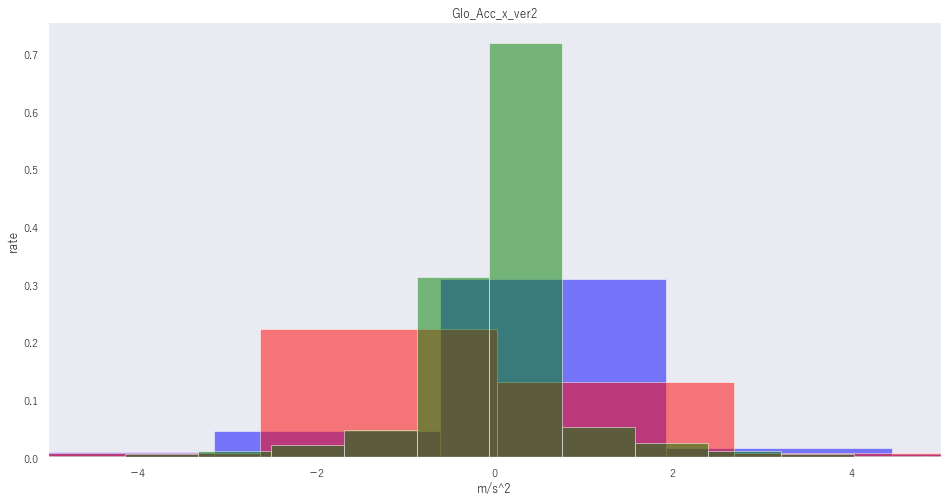

In [44]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,1,1)

ax.hist(train_Bag.reshape([-1, 3])[:, 0], normed=True, bins=100, color='blue', alpha=0.5)
ax.hist(user2_Bag.reshape([-1, 3])[:, 0], normed=True, bins=100, color='red', alpha=0.5)
ax.hist(user3_Bag.reshape([-1, 3])[:, 0], normed=True, bins=100, color='green', alpha=0.5)

ax.set_title('Glo_Acc_x_ver2')
ax.set_xlabel('m/s^2')
ax.set_ylabel('rate')
plt.xlim(-5, 5)
# plt.ylim(0, 0.1)
plt.grid(False)
fig.show()

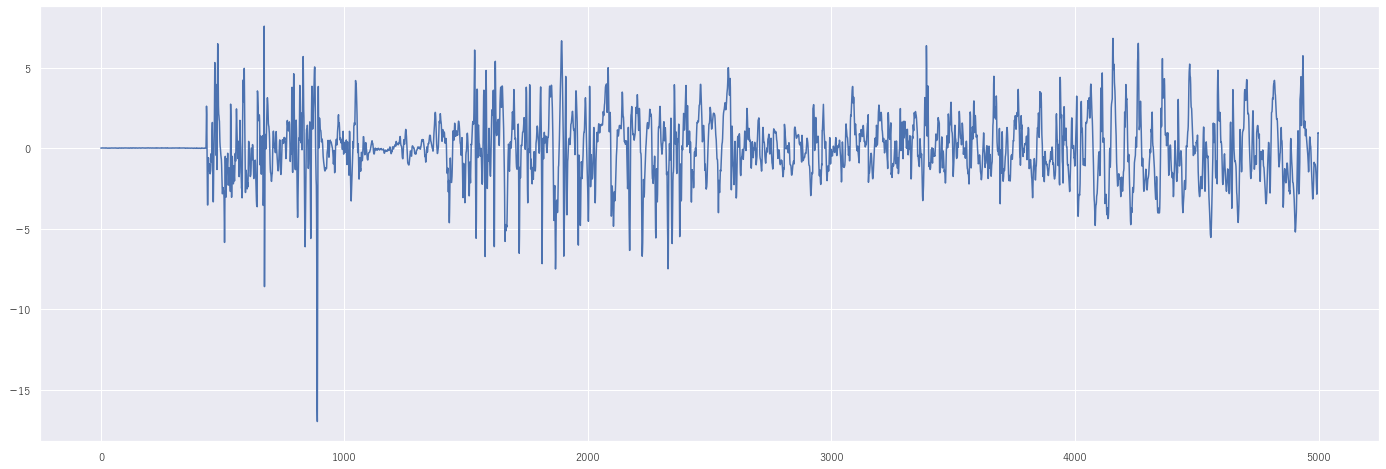

In [94]:
plt.figure(figsize=(24, 8))
plt.plot(train_Bag.reshape([-1, 3])[0:5000, 0])

# 保持位置別，移動状態別で4x8でプロットする

In [95]:
user1 = [train_Bag, train_Hips, train_Torso, train_Hand]
user2 = [user2_Bag, user2_Hips, user2_Torso, user2_Hand]
user3 = [user3_Bag, user3_Hips, user3_Torso, user3_Hand]

hold_positions = ['Bag', 'Hips', 'Torso', 'Hand']
moving_states = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid valu

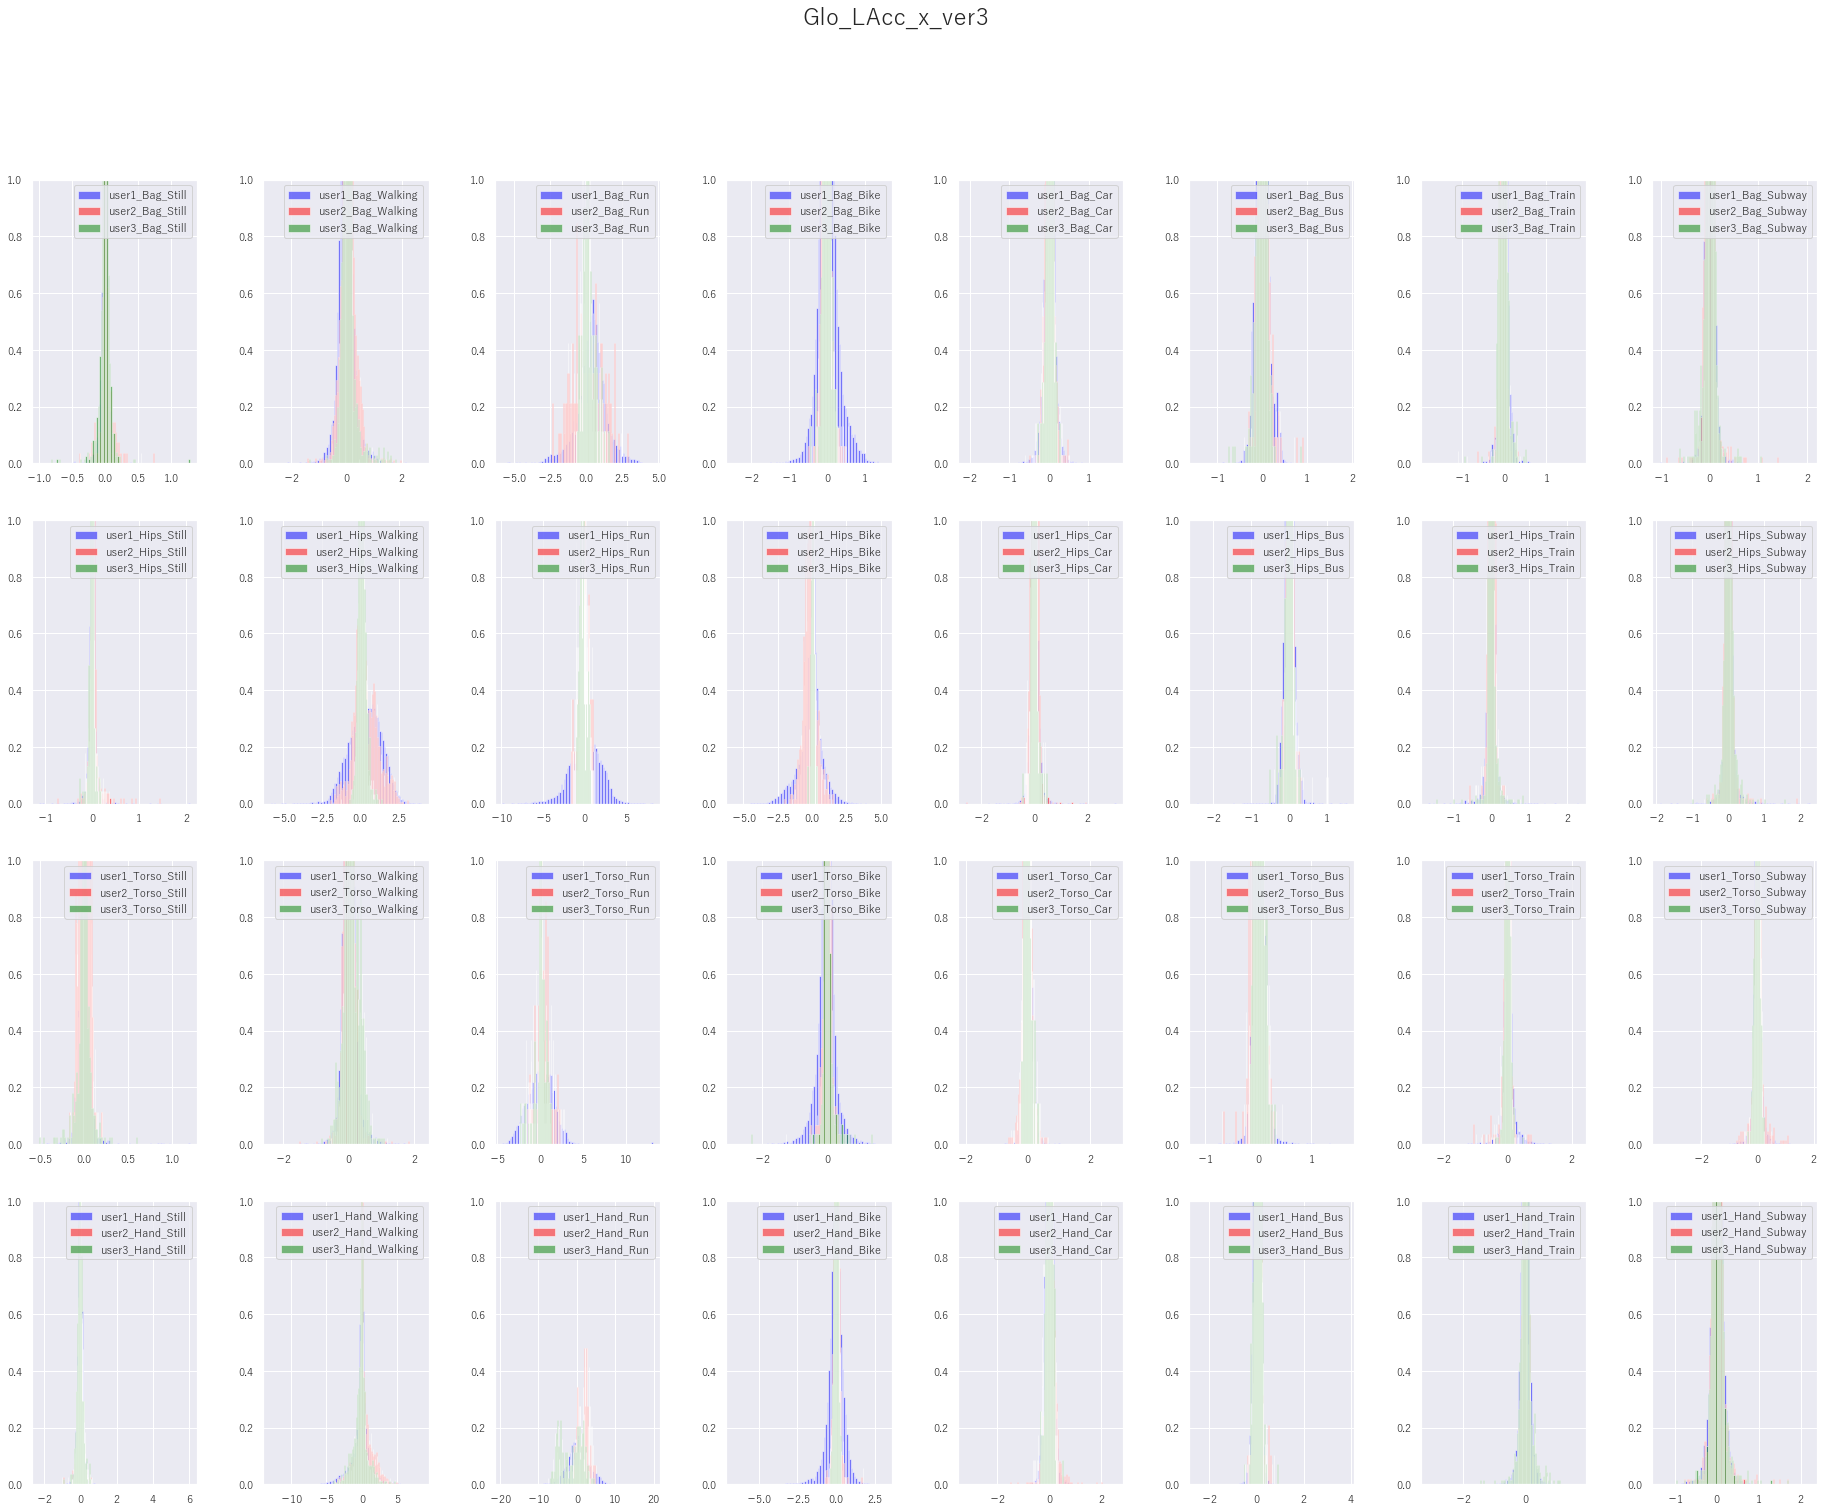

Wall time: 5min 10s


In [96]:
%%time
fig = plt.figure(figsize=(32, 24))

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.suptitle("Glo_LAcc_x_ver3", fontsize=24)
for i in range(4):
    for j in range(8):
        plt.subplot(4, 8, i*8 + (j+1))
        plt.hist(user1[i].mean(axis=1)[:, 0][train_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user1_' + hold_positions[i] + "_" + moving_states[j], color='blue', alpha=0.5)
        plt.hist(user2[i].mean(axis=1)[:, 0][user2_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user2_' + hold_positions[i] + "_" + moving_states[j], color='red', alpha=0.5)
        plt.hist(user3[i].mean(axis=1)[:, 0][user3_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user3_' + hold_positions[i] + "_" + moving_states[j], color='green', alpha=0.5)
        plt.ylim(0, 1)
        plt.legend()
plt.show()
fig.savefig("Glo_LAcc_x_ver3")

In [81]:
fig.savefig("test")

In [68]:
user2[i].mean(axis=1)[:, 0][user2_Label[:, 0, 0]==j+1]

IndexError: too many indices for array

In [69]:
user2_Label.shape

(14813, 500)

C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


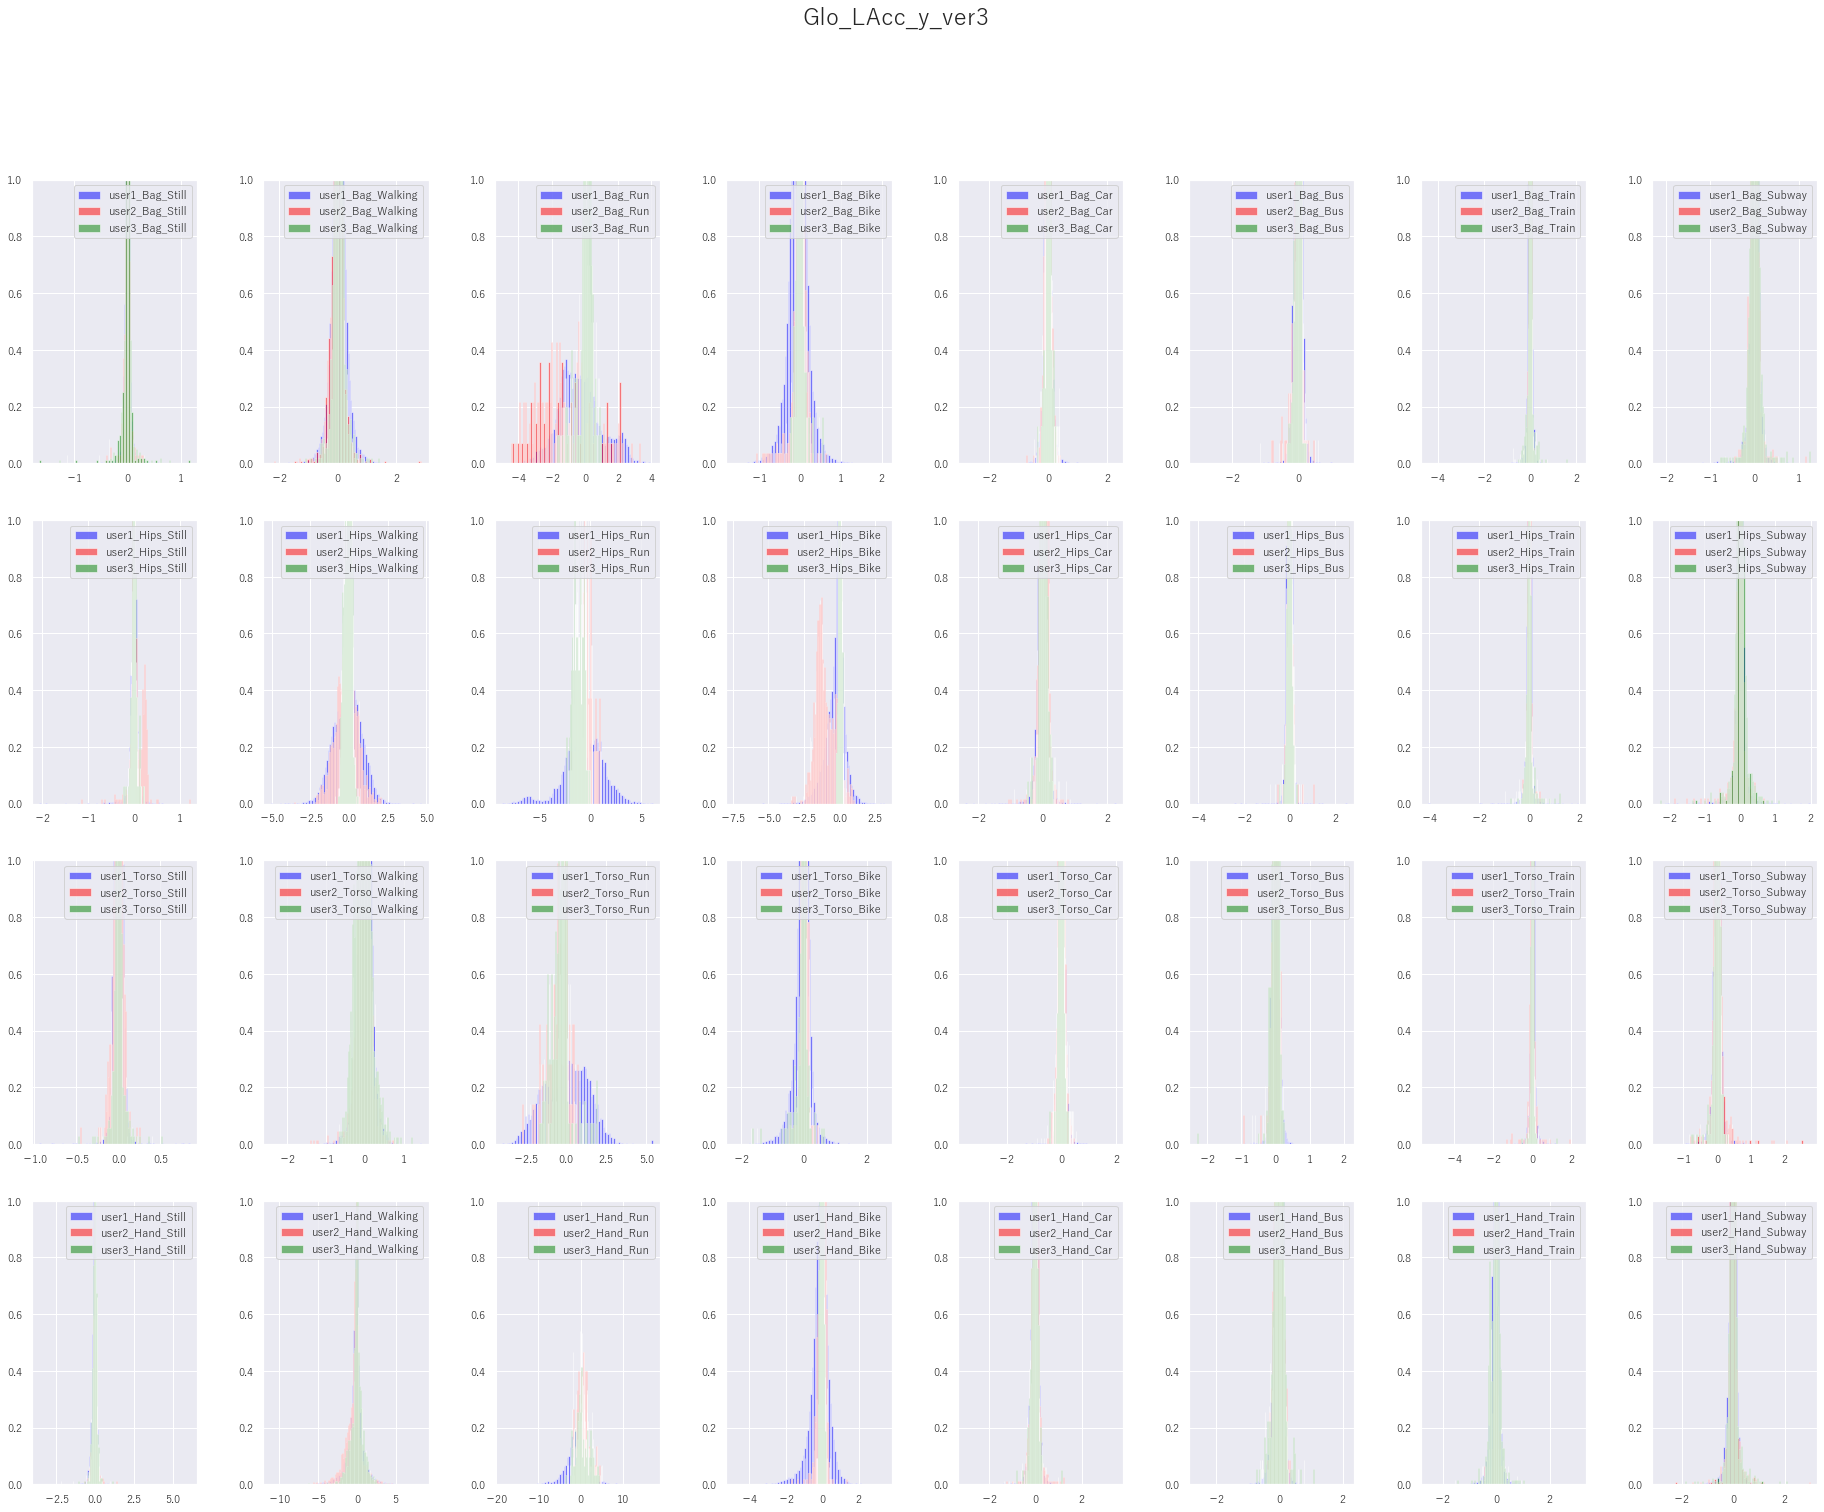

Wall time: 1min 10s
Parser   : 147 ms


In [97]:
%%time
fig = plt.figure(figsize=(32, 24))

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.suptitle("Glo_LAcc_y_ver3", fontsize=24)
for i in range(4):
    for j in range(8):
        plt.subplot(4, 8, i*8 + (j+1))
        plt.hist(user1[i].mean(axis=1)[:, 1][train_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user1_' + hold_positions[i] + "_" + moving_states[j], color='blue', alpha=0.5)
        plt.hist(user2[i].mean(axis=1)[:, 1][user2_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user2_' + hold_positions[i] + "_" + moving_states[j], color='red', alpha=0.5)
        plt.hist(user3[i].mean(axis=1)[:, 1][user3_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user3_' + hold_positions[i] + "_" + moving_states[j], color='green', alpha=0.5)
        plt.ylim(0, 1)
        plt.legend()
plt.show()
fig.savefig("Glo_LAcc_y_ver3")

C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


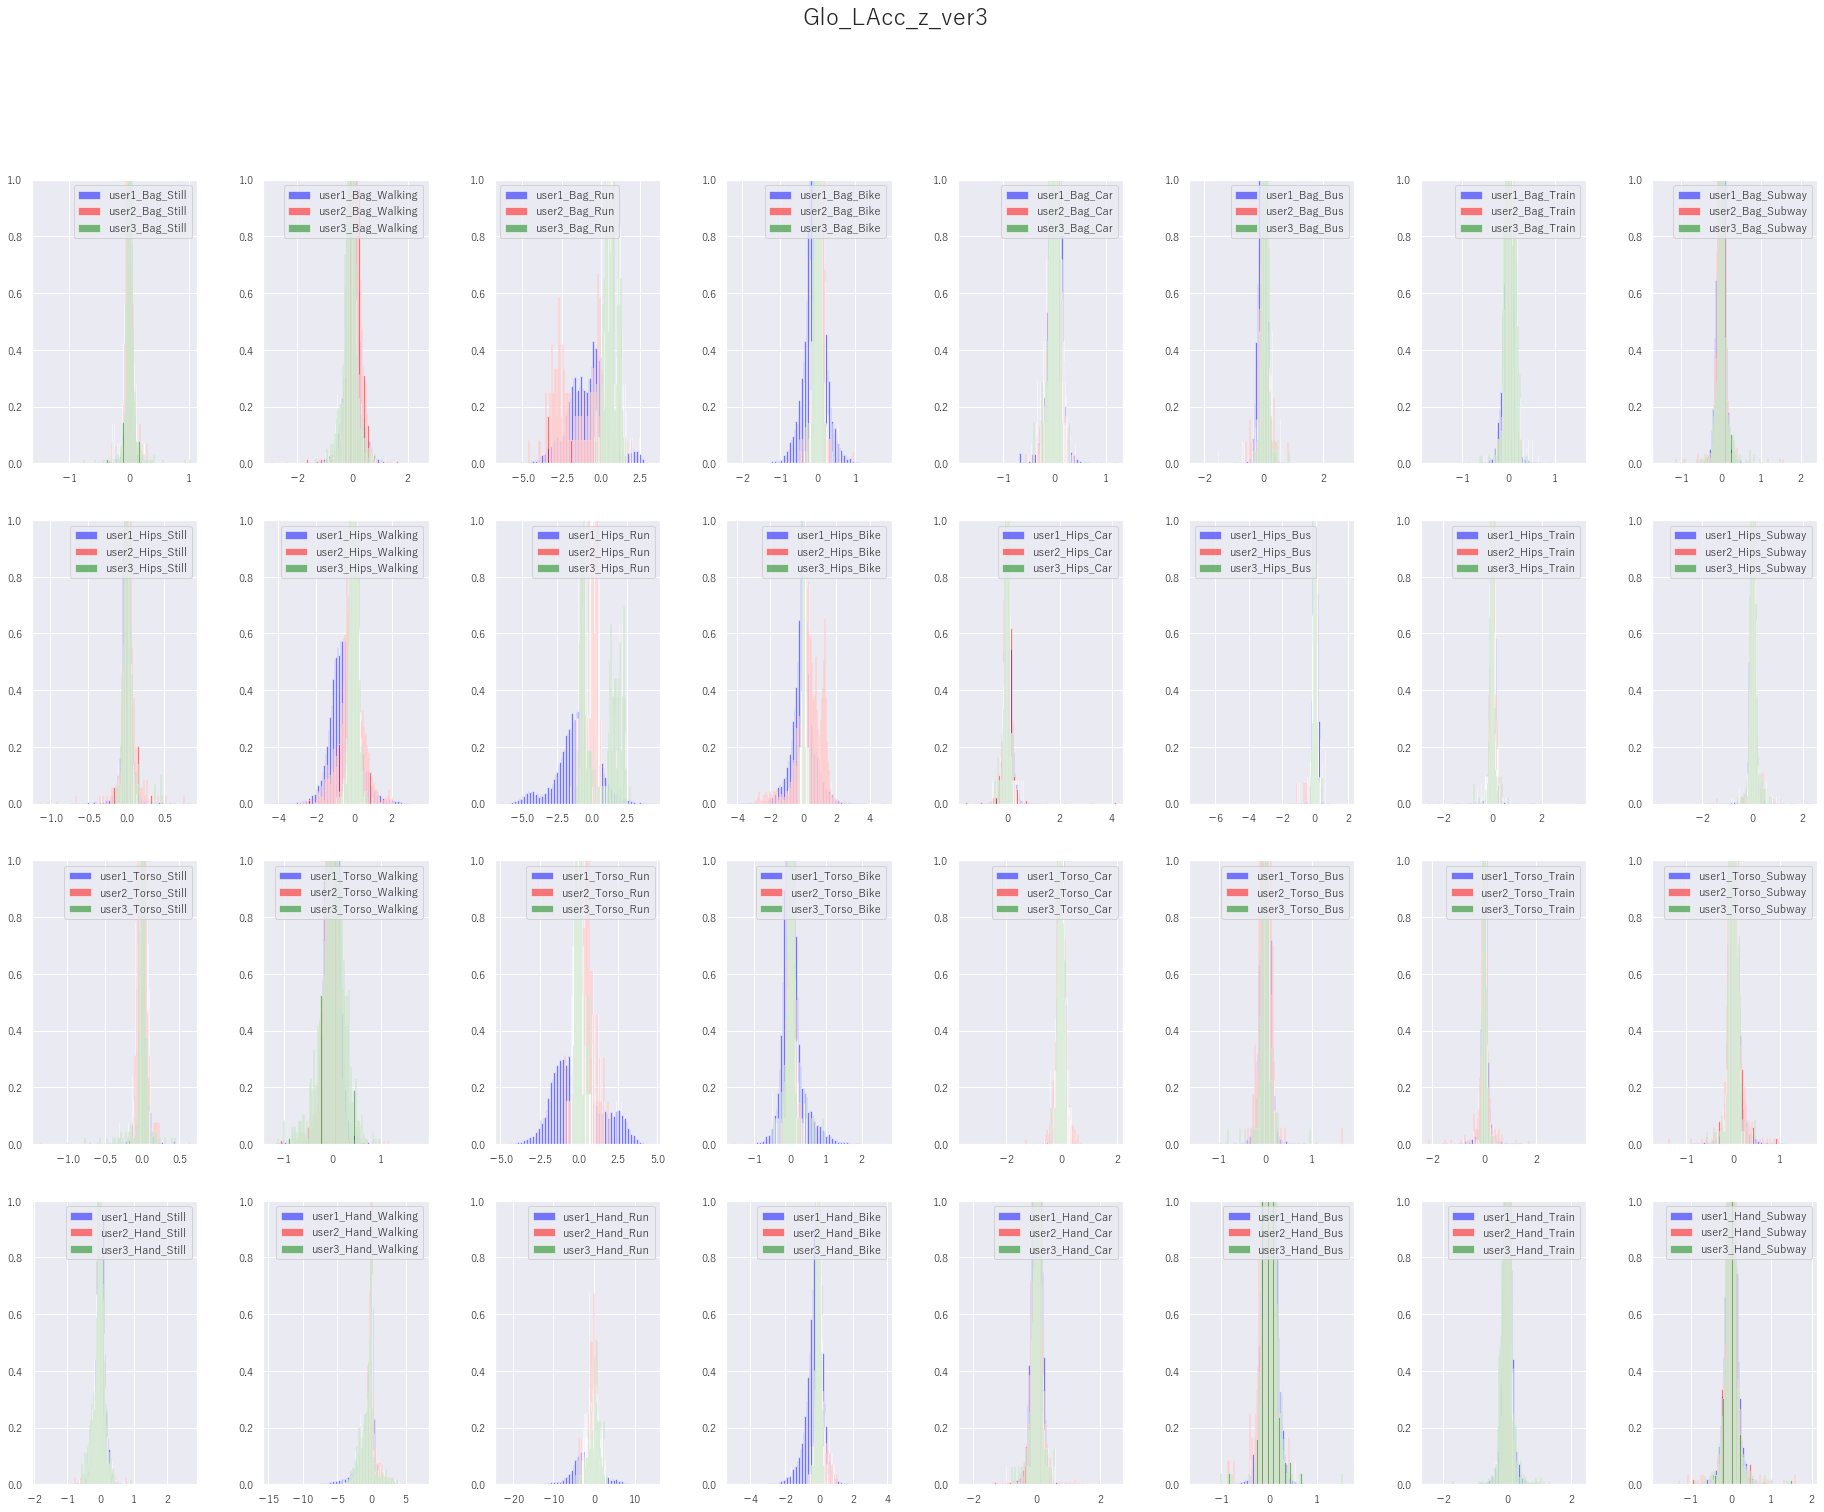

Wall time: 1min 6s


In [98]:
%%time
fig = plt.figure(figsize=(32, 24))

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.suptitle("Glo_LAcc_z_ver3", fontsize=24)
for i in range(4):
    for j in range(8):
        plt.subplot(4, 8, i*8 + (j+1))
        plt.hist(user1[i].mean(axis=1)[:, 2][train_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user1_' + hold_positions[i] + "_" + moving_states[j], color='blue', alpha=0.5)
        plt.hist(user2[i].mean(axis=1)[:, 2][user2_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user2_' + hold_positions[i] + "_" + moving_states[j], color='red', alpha=0.5)
        plt.hist(user3[i].mean(axis=1)[:, 2][user3_Label[:, 0, 0]==j+1], normed=True, bins=100, label='user3_' + hold_positions[i] + "_" + moving_states[j], color='green', alpha=0.5)
        plt.ylim(0, 1)
        plt.legend()
plt.show()
fig.savefig("Glo_LAcc_z_ver3")